In [1]:
import pandas as pd

# Loading the CSV file
file_path = 'data/evals.csv'
evals_df = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe
evals_df.head()

,ID,prof_ID,score,age,bty_avg,gender,ethnicity,language,rank,pic_outfit,pic_color,cls_did_eval,cls_students,cls_level
0,1,1,4.7,36,5.0,female,minority,english,tenure track,not formal,color,24,43,upper
1,2,1,4.1,36,5.0,female,minority,english,tenure track,not formal,color,86,125,upper
2,3,1,3.9,36,5.0,female,minority,english,tenure track,not formal,color,76,125,upper
3,4,1,4.8,36,5.0,female,minority,english,tenure track,not formal,color,77,123,upper
4,5,2,4.6,59,3.0,male,not minority,english,tenured,not formal,color,17,20,upper


In [2]:
evals_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
ID,1,2,3,4,5,6,7,8,9,10,...,454,455,456,457,458,459,460,461,462,463
prof_ID,1,1,1,1,2,2,2,3,3,4,...,93,93,93,93,93,93,94,94,94,94
score,4.7,4.1,3.9,4.8,4.6,4.3,2.8,4.1,3.4,4.5,...,4.5,4.5,4.5,4.6,4.1,4.5,3.5,4.4,4.4,4.1
age,36,36,36,36,59,59,59,51,51,40,...,32,32,32,32,32,32,42,42,42,42
bty_avg,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.333,3.333,3.167,...,6.833,6.833,6.833,6.833,6.833,6.833,5.333,5.333,5.333,5.333
gender,female,female,female,female,male,male,male,male,male,female,...,male,male,male,male,male,male,female,female,female,female
ethnicity,minority,minority,minority,minority,not minority,not minority,not minority,not minority,not minority,not minority,...,not minority,not minority,not minority,not minority,not minority,not minority,minority,minority,minority,minority
language,english,english,english,english,english,english,english,english,english,english,...,english,english,english,english,english,english,non-english,non-english,non-english,non-english
rank,tenure track,tenure track,tenure track,tenure track,tenured,tenured,tenured,tenured,tenured,tenured,...,tenure track,tenure track,tenure track,tenure track,tenure track,tenure track,tenure track,tenure track,tenure track,tenure track
pic_outfit,not formal,not formal,not formal,not formal,not formal,not formal,not formal,not formal,not formal,not formal,...,not formal,not formal,not formal,not formal,not formal,not formal,not formal,not formal,not formal,not formal


In [5]:
import pandas as pd

# Assuming 'evals' is your DataFrame
evals_ch5 = evals_df[['ID', 'score', 'bty_avg', 'age']]

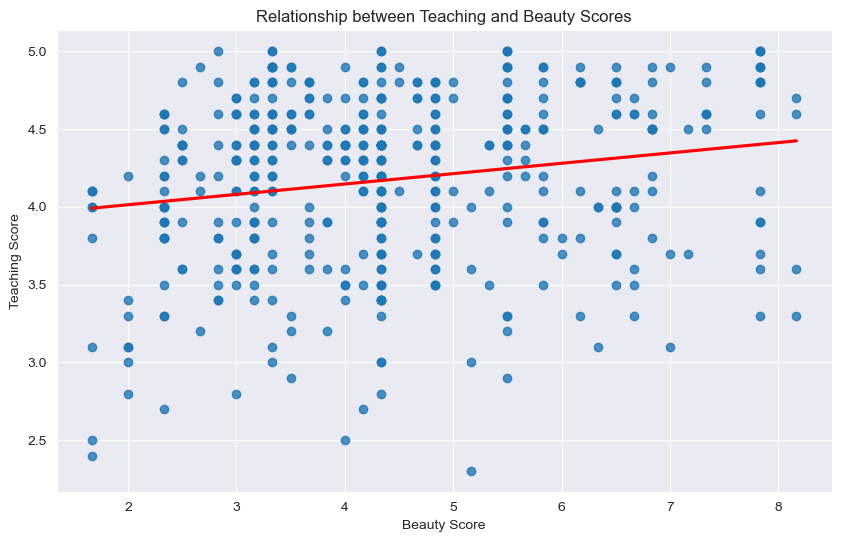

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Using the previously selected columns
data = evals_ch5

# Creating the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='bty_avg', y='score', data=data, ci=None, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('Beauty Score')
plt.ylabel('Teaching Score')
plt.title('Relationship between Teaching and Beauty Scores')

# Showing the plot
plt.show()

In [7]:
import statsmodels.api as sm

# Assuming 'evals_ch5' is your DataFrame
X = evals_ch5['bty_avg']
y = evals_ch5['score']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Displaying the summary (regression table)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           5.08e-05
Time:                        20:44:30   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8803      0.076     50.961      0.0

In [8]:
import statsmodels.api as sm

# Assuming 'evals_ch5' is your DataFrame and the model has been fitted
X = evals_ch5['bty_avg']
y = evals_ch5['score']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Extracting fitted values and residuals
evals_ch5['fitted_values'] = model.fittedvalues
evals_ch5['residuals'] = model.resid

# Displaying the first few rows of the dataframe with fitted values and residuals
print(evals_ch5.head())

   ID  score  bty_avg  age  fitted_values  residuals
0   1    4.7      5.0   36       4.213523   0.486477
1   2    4.1      5.0   36       4.213523  -0.113523
2   3    3.9      5.0   36       4.213523  -0.313523
3   4    4.8      5.0   36       4.213523   0.586477
4   5    4.6      3.0   59       4.080249   0.519751


/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_17587/529518457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evals_ch5['fitted_values'] = model.fittedvalues
/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_17587/529518457.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evals_ch5['residuals'] = model.resid


In [10]:
import statsmodels.api as sm

# Using the previously selected columns (evals_ch5 equivalent)
data = evals_ch5

# Preparing data for regression analysis
X = data['bty_avg']
y = data['score']
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Adding fitted values and residuals to the dataframe
data['fitted_values'] = model.fittedvalues
data['residuals'] = model.resid

# Displaying the first few rows of the dataframe
data.head()

/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_17587/1857734145.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fitted_values'] = model.fittedvalues
/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_17587/1857734145.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['residuals'] = model.resid


,ID,score,bty_avg,age,fitted_values,residuals
0,1,4.7,5.0,36,4.213523,0.486477
1,2,4.1,5.0,36,4.213523,-0.113523
2,3,3.9,5.0,36,4.213523,-0.313523
3,4,4.8,5.0,36,4.213523,0.586477
4,5,4.6,3.0,59,4.080249,0.519751


In [11]:
# Selecting specific columns from the original dataframe
selected_columns_v2 = evals_df[['ID', 'prof_ID', 'score', 'bty_avg']]

# Displaying the first few rows of the selected columns
selected_columns_v2.head()

,ID,prof_ID,score,bty_avg
0,1,1,4.7,5.0
1,2,1,4.1,5.0
2,3,1,3.9,5.0
3,4,1,4.8,5.0
4,5,2,4.6,3.0


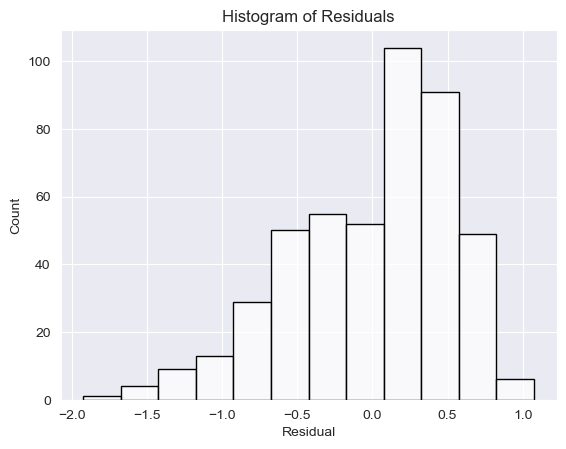

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with residuals
sns.histplot(data['residuals'], binwidth=0.25, color='white', edgecolor='black')
plt.xlabel('Residual')
plt.title('Histogram of Residuals')
plt.show()

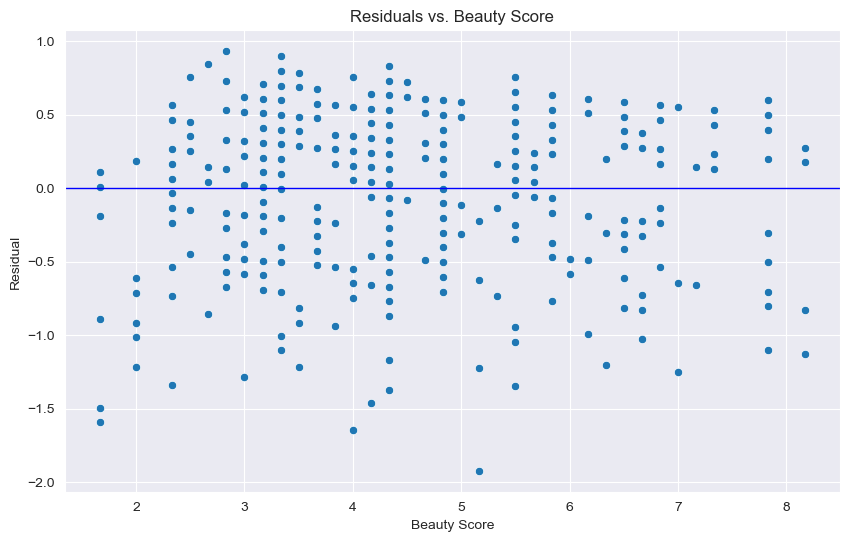

In [13]:
# Creating a scatter plot of residuals against beauty scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bty_avg', y='residuals', data=data)

# Adding a horizontal line at y=0
plt.axhline(y=0, color='blue', linestyle='-', linewidth=1)

# Adding labels
plt.xlabel('Beauty Score')
plt.ylabel('Residual')
plt.title('Residuals vs. Beauty Score')

# Showing the plot
plt.show()

In [15]:
import pandas as pd

# Redefining the bootstrapping process to match the R output format
n_bootstrap_samples = 1000
bootstrap_results = []

for i in range(n_bootstrap_samples):
    # Generating a bootstrap sample: sample with replacement
    bootstrap_sample = data.sample(n=len(data), replace=True)
    
    # Fitting the linear regression model
    model = ols('score ~ bty_avg', data=bootstrap_sample).fit()
    
    # Storing the replicate number and slope coefficient
    bootstrap_results.append({'replicate': i + 1, 'stat': model.params['bty_avg']})

# Creating a DataFrame to hold the bootstrap results
bootstrap_distn_slope_df = pd.DataFrame(bootstrap_results)

# Displaying the first 10 rows of the bootstrap results
bootstrap_distn_slope_df.head(10)

,replicate,stat
0,1,0.076493
1,2,0.093422
2,3,0.058381
3,4,0.057870
4,5,0.071130
5,6,0.057514
6,7,0.041467
7,8,0.073306
8,9,0.066035
9,10,0.048397


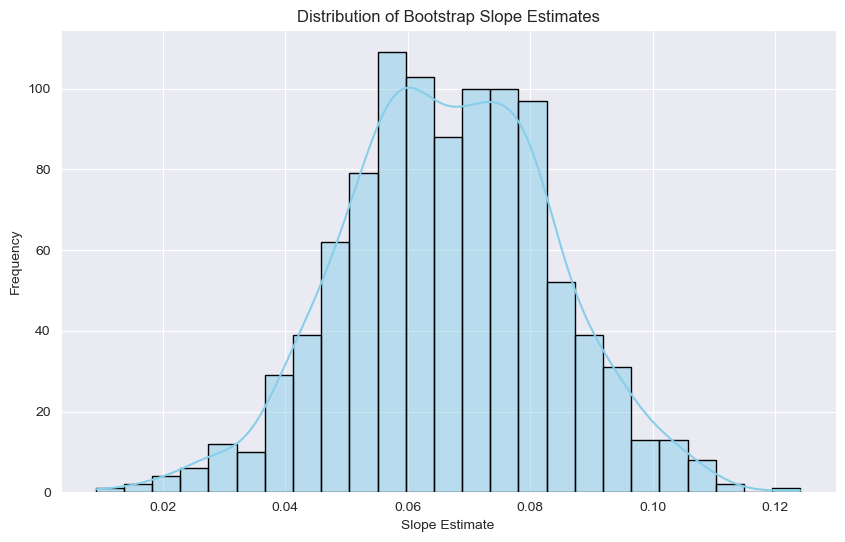

In [16]:
# Creating a histogram to visualize the distribution of bootstrap slope estimates
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_distn_slope_df['stat'], kde=True, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Slope Estimate')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrap Slope Estimates')

# Showing the plot
plt.show()

In [17]:
import numpy as np

# Calculating the 95% percentile-based confidence interval
lower_bound = np.percentile(bootstrap_distn_slope_df['stat'], 2.5)
upper_bound = np.percentile(bootstrap_distn_slope_df['stat'], 97.5)

percentile_ci = (lower_bound, upper_bound)
percentile_ci

(0.03288770601012654, 0.10011268185688103)

In [18]:
# Calculating the observed slope from the original dataset
observed_model = ols('score ~ bty_avg', data=evals_df).fit()
observed_slope = observed_model.params['bty_avg']
observed_slope

0.06663703701981408

In [19]:
# Standard error based confidence interval calculation
# Calculating the standard error of the bootstrap slopes
std_error = np.std(bootstrap_distn_slope_df['stat'], ddof=1)

# Calculating the 95% confidence interval using the standard error method
z_score = 1.96  # z-score for 95% confidence
lower_bound_se = observed_slope - z_score * std_error
upper_bound_se = observed_slope + z_score * std_error

se_ci = (lower_bound_se, upper_bound_se)
se_ci

(0.0333900643380794, 0.09988400970154876)

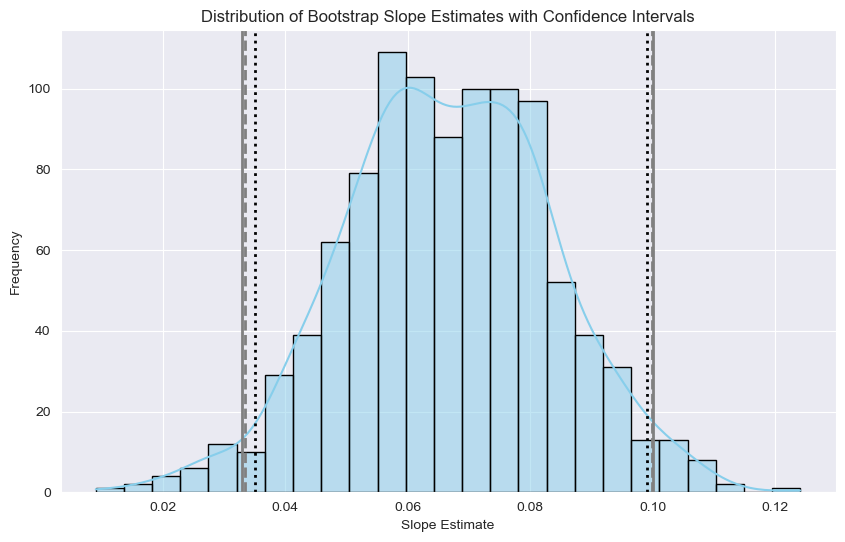

In [20]:
# Creating a histogram with confidence intervals shaded
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_distn_slope_df['stat'], kde=True, color='skyblue', edgecolor='black')

# Adding percentile-based confidence interval
plt.axvline(x=percentile_ci[0], color='grey', linestyle='solid', linewidth=2)
plt.axvline(x=percentile_ci[1], color='grey', linestyle='solid', linewidth=2)

# Adding standard error-based confidence interval
plt.axvline(x=se_ci[0], color='grey', linestyle='dashed', linewidth=2)
plt.axvline(x=se_ci[1], color='grey', linestyle='dashed', linewidth=2)

# Adding a custom confidence interval (0.035 to 0.099)
plt.axvline(x=0.035, color='black', linestyle='dotted', linewidth=2)
plt.axvline(x=0.099, color='black', linestyle='dotted', linewidth=2)

# Adding labels and title
plt.xlabel('Slope Estimate')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrap Slope Estimates with Confidence Intervals')

# Showing the plot
plt.show()

In [21]:
# Generating a null distribution for the slope using permutation testing
null_slopes = np.zeros(n_bootstrap_samples)

for i in range(n_bootstrap_samples):
    # Permuting the 'bty_avg' column
    permuted_bty_avg = np.random.permutation(evals_df['bty_avg'])

    # Fitting the linear regression model to the permuted data
    permuted_model = sm.OLS(evals_df['score'], sm.add_constant(permuted_bty_avg)).fit()
    
    # Storing the slope coefficient
    null_slopes[i] = permuted_model.params[1]

# Displaying the first few values of the null distribution
null_slopes[:10]

array([-2.82337671e-02, -2.57232716e-02, -1.94297756e-02, -3.64887674e-02,
       -3.75147276e-03, -1.39353358e-05,  1.06905099e-02,  1.28997422e-02,
       -4.07602420e-03, -1.36797038e-02])

In [22]:
# Creating a DataFrame to hold the null distribution results
null_distn_slope_df = pd.DataFrame({'replicate': np.arange(1, n_bootstrap_samples + 1), 'stat': null_slopes})

# Displaying the first 10 rows of the null distribution results
null_distn_slope_df.head(10)

,replicate,stat
0,1,-0.028234
1,2,-0.025723
2,3,-0.019430
3,4,-0.036489
4,5,-0.003751
5,6,-0.000014
6,7,0.010691
7,8,0.012900
8,9,-0.004076
9,10,-0.013680


In [23]:
# Calculating the p-value for the observed slope against the null distribution
# Counting how many slopes in the null distribution are as extreme as the observed slope
extreme_count = np.sum(np.abs(null_slopes) >= np.abs(observed_slope))

# Calculating the p-value (two-tailed test)
p_value = extreme_count / n_bootstrap_samples
p_value

0.0